# Étude de cas - Titanic

## Table des matières

[**Étape 1 : Compréhension métier**](#Étape-1-:-Compréhension-métier)

[**Étape 2 : Compréhension des données**](#Étape-2-:-Compréhension-des-données)

- [**Chargement des données**](#Chargement-des-données)
- [**Vérification de la qualité des données**](#Vérification-de-la-qualité-des-données)
- [**Analyse exploratoire des données - AED**](#Analyse-exploratoire-des-données---AED)
 
[**Étape 3 : Préparation des données**](#Étape-3-:-Préparation-des-données)
- [**Traitement des données manquantes**](#Traitement-des-données-manquantes)
- [**Ingénierie des caractéristiques**](#Ingénierie-des-caractéristiques)

[**Étape 4 : Modélisation**](#Étape-4-:-Modélisation)

## Étape 1 : Compréhension métier
Cette phase initiale se concentre sur la compréhension des objectifs et des exigences du projet d'un point de vue métier, puis sur la conversion de cette connaissance en une définition du problème de data mining et un plan préliminaire conçu pour atteindre les objectifs.

#### Histoire du Titanic
Le naufrage du RMS Titanic est l'un des naufrages les plus tristement célèbres de l'histoire. Le 15 avril 1912, lors de son voyage inaugural, le Titanic a coulé après avoir heurté un iceberg, tuant 1502 personnes sur 2224 passagers et membres d'équipage. Cette tragédie sensationnelle a choqué la communauté internationale et conduit à de meilleures réglementations de sécurité pour les navires.

L'une des raisons pour lesquelles le naufrage a entraîné une telle perte de vies humaines était qu'il n'y avait pas assez de canots de sauvetage pour les passagers et l'équipage. Bien qu'il y ait eu un élément de chance impliqué dans la survie au naufrage, certains groupes de personnes étaient plus susceptibles de survivre que d'autres, comme les femmes, les enfants et les passagers de la classe supérieure.

#### Objectif
Dans ce défi, nous allons compléter l'analyse des types de personnes susceptibles de survivre.

De plus, nous construirons un modèle de régression pour prédire le prix du billet (Fare).

## Étape 2 : Compréhension des données
La phase de compréhension des données commence par une collecte initiale des données et se poursuit par des activités visant à se familiariser avec les données, à identifier les problèmes de qualité des données, à découvrir les premiers aperçus des données ou à détecter des sous-ensembles intéressants pour former des hypothèses sur les informations cachées. Cette étape est souvent mélangée avec l'étape suivante, la préparation des données.

### Dictionnaire des données
Les données sont dans un fichier csv titanic.csv.

| Variable | Définition | Clé |
| --- | --- | --- |
| survival | Survie | 0 = Non, 1 = Oui |
| pclass | Classe de billet | 1 = 1ère, 2 = 2ème, 3 = 3ème |
| sex | Sexe | male/female |	
| Age | Âge | en années |
| sibsp | Nombre de frères et sœurs / conjoints à bord du Titanic | |
| parch | Nombre de parents / enfants à bord du Titanic | |
| ticket | Numéro de billet | |
| fare | Tarif passager | |
| cabin | Numéro de cabine | |
| embarked | Port d'embarquement | C = Cherbourg, Q = Queenstown, S = Southampton |

**Notes sur les variables**
- pclass : Un indicateur du statut socio-économique (SES)
 - 1ère = Supérieure
 - 2ème = Moyenne
 - 3ème = Inférieure

- age : L'âge est fractionnel s'il est inférieur à 1. Si l'âge est estimé, il est sous la forme de xx.5

- sibsp : Le jeu de données définit les relations familiales de cette manière...
- Frère ou sœur = frère, sœur, demi-frère, demi-sœur
- Conjoint = mari, femme (les maîtresses et fiancés ont été ignorés)

- parch : Le jeu de données définit les relations familiales de cette manière...
 - Parent = mère, père
 - Enfant = fille, fils, belle-fille, beau-fils
 - Certains enfants ont voyagé uniquement avec une nounou, donc parch=0 pour eux.

### Chargement des données

Ce jeu de données est dans ```titanic.csv```. Assurez-vous que le fichier est dans le dossier actuel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# df_titanic = pd.read_csv('titanic.csv')
# df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Vérification de la qualité des données
Vérifiez la qualité des données. La vérification la plus courante consiste à contrôler les valeurs manquantes. Nous pouvons effectuer quelques nettoyages de base des données comme le nettoyage du champ de devise.
- Vérifier les valeurs nulles
- Le champ de devise doit être converti en float, supprimer '$' ou ',', parfois la valeur négative est entre ()


##### Tâche 1 : Vérifier les informations de base du DataFrame

Indice : utilisez la fonction info().
Discutez des valeurs manquantes dans le dataframe.

In [3]:
# df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 62.7+ KB


In [4]:
## Une autre façon de voir le nombre de valeurs manquantes dans chaque colonne

# df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Tâche 2 : Nettoyer la colonne Fare, convertir en Float
Supprimer le "$" de Fare, convertir le type de données en float.

In [5]:
# nettoyer Fare, convertir en float

# df_titanic.Fare = df_titanic.Fare.str.replace('$','')
# df_titanic['Fare'] = df_titanic.Fare.astype(float)
# df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Tâche 3 : Vérifier les statistiques des colonnes numériques

Indice : utilisez la fonction describe().

Discutez :
- Les statistiques de Age, SibSp, Parch, Fare
- Que signifie Survived ?

In [6]:
# df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analyse exploratoire des données - AED
L'AED est une approche pour analyser des ensembles de données afin de résumer leurs principales caractéristiques, souvent avec des méthodes visuelles.

#### Types de caractéristiques
##### Caractéristiques catégorielles :
Une variable catégorielle est une variable qui a deux ou plusieurs catégories et chaque valeur dans cette caractéristique peut être catégorisée par elles. Par exemple, le sexe est une variable catégorielle ayant deux catégories (masculin et féminin). Nous ne pouvons pas trier ou donner un ordre à de telles variables. Elles sont également connues sous le nom de variables nominales.

Caractéristiques catégorielles dans le jeu de données : Sex, Embarked.

##### Caractéristique continue :
Une caractéristique est dite continue si elle peut prendre des valeurs entre deux points ou entre les valeurs minimales et maximales de la colonne des caractéristiques.

Caractéristiques continues dans le jeu de données : Fare

### Caractéristiques catégorielles
Nous analyserons Survived comme variable univariée. Relation entre Sex et Survival, Embarked et Survival.

#### Combien ont survécu
Diagramme en barres sur la colonne Survived. Il y a plusieurs façons de faire le diagramme en barres. Nous en démontrerons 2 ici, le countplot de seaborn et le bar de la série pandas.

##### Tâche 4 : Tracer un diagramme en barres pour Péris vs. Survécus
Tracez un diagramme en barres pour la colonne Survived. Survived=0 signifie péri, Survived=1 signifie Survécu.

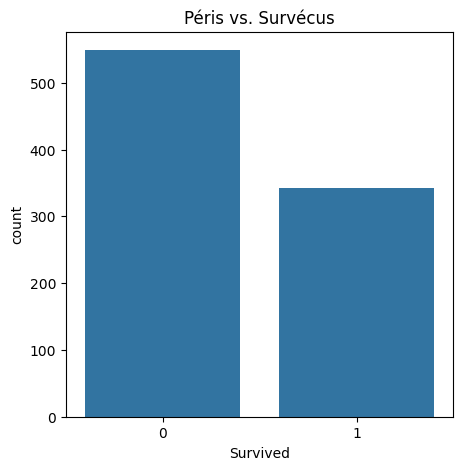

In [7]:
# Combien ont survécu

# f,ax=plt.subplots(figsize=(5,5))
# sns.countplot(x='Survived',data=df_titanic, ax = ax)
# ax.set_title('Péris vs. Survécus')

# plt.show()

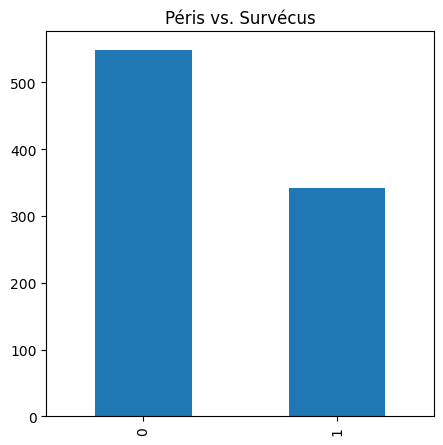

In [8]:
# Nombre de survivants

# f,ax=plt.subplots(figsize=(5,5))
# survived_counts = df_titanic.Survived.value_counts()
# survived_counts.plot.bar(ax=ax)
# ax.set_title('Péris vs. Survécus')
# plt.show()

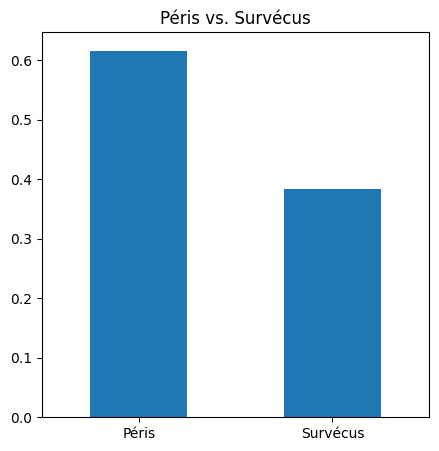

In [9]:
# Pourcentage de survivants

# f,ax=plt.subplots(figsize=(5,5))
# survived_counts = df_titanic.Survived.value_counts(normalize=True)
# survived_counts.plot.bar(ax=ax)
# ax.set_title('Péris vs. Survécus')
# ax.set_xticklabels( ['Péris', 'Survécus'], rotation=0)
# plt.show()

#### Relation entre Sexe et Survie
Nous pouvons utiliser la fonction d'agrégation ou le tracé.

Les 2 cellules suivantes démontrent la fonction d'agrégation.

La cellule suivante démontre le diagramme en barres et le countplot.


##### Tâche 5 : Tracer un diagramme en barres du nombre de passagers masculins et féminins

Indice : Utilisez le countplot de seaborn.

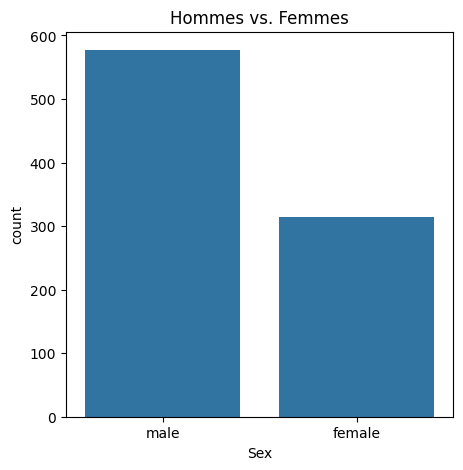

In [10]:
## Hommes vs. Femmes

# f,ax=plt.subplots(figsize=(5,5))
# sns.countplot(x='Sex',data=df_titanic,ax=ax)
# ax.set_title('Hommes vs. Femmes')
# plt.show()

##### Tâche 6 : Grouper par Sexe pour trouver le taux de survie des hommes et des femmes

In [11]:
# Taux de survie femme/homme

# df_titanic.groupby(['Sex'], as_index=False).agg({'Survived':'mean'})

,Sex,Survived
0,female,0.742038
1,male,0.188908


##### Tâche 7 : Tracer le diagramme en barres Péris vs. Survécus pour les hommes et les femmes
Nous utiliserons à nouveau le countplot de seaborn, mais en définissant l'argument `hue` sur 'Survived'.

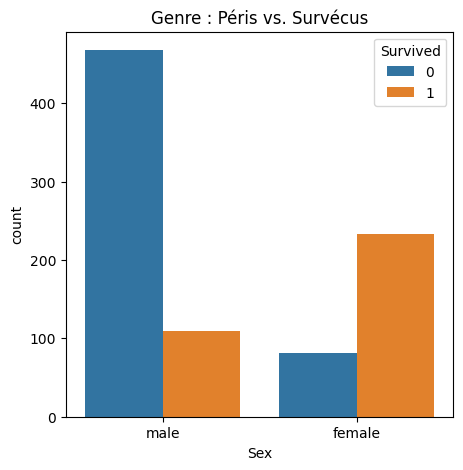

In [12]:
# Péris vs. Survécus pour hommes/femmes

# f,ax=plt.subplots(figsize=(5,5))
# sns.countplot(x='Sex',hue='Survived',data=df_titanic,ax=ax)
# ax.set_title('Genre : Péris vs. Survécus')
# plt.show()

Le nombre d'hommes sur le navire est beaucoup plus élevé que le nombre de femmes. Pourtant, le nombre de femmes survivantes est presque deux fois plus élevé que le nombre d'hommes survivants. La majorité des femmes ont survécu tandis que la grande majorité des hommes ont péri.

#### Pclass et Survie
##### Tâche 8 : Lister le taux de survie de chaque Pclass 

In [13]:
# df_titanic.groupby(['Pclass'], as_index=False).agg({'Survived':'mean'})

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


##### Tâche 9 : Tracer Péris vs. Survécus pour chaque Pclass

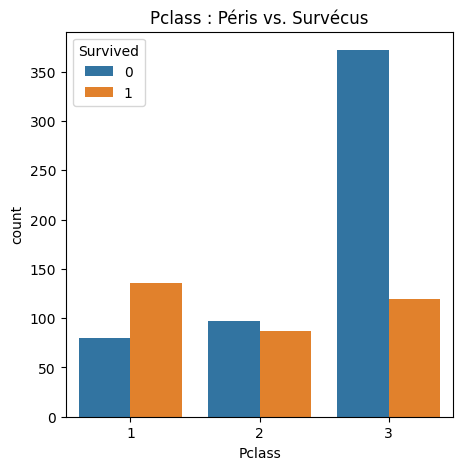

In [14]:
# Histogramme et Décompte avec seaborn

# f,ax=plt.subplots(figsize=(5,5))
# sns.countplot(x='Pclass',hue='Survived',data=df_titanic,ax=ax)
# ax.set_title('Pclass : Péris vs. Survécus')
# plt.show()

##### Tâche 10 : Tracer l'histogramme pour l'Age
Utilisez la fonction hist() de la série pandas qui gère les valeurs manquantes.

<AxesSubplot:>

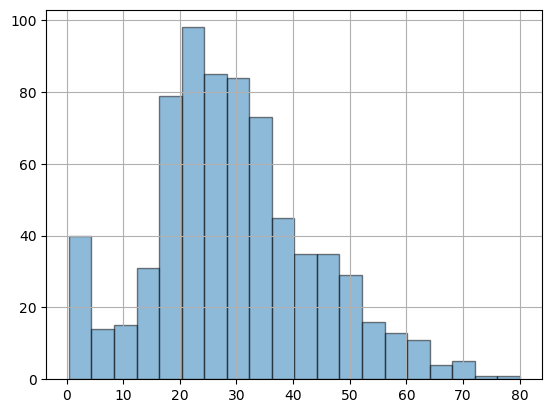

In [15]:
# Utilisons dataframe hist() qui gérera les NaN par défaut

# fig, ax = plt.subplots()
# df_titanic.Age.hist(ax=ax, bins=20, edgecolor='black', alpha=0.5)

##### Tâche 11 : Empiler l'histogramme d'âge des survivants sur l'histogramme d'âge global
Tracez l'histogramme pour l'Age, puis filtrez les passagers survivants et tracez l'histogramme pour l'Age sur le même axe. Définissez une couleur et une étiquette différentes.

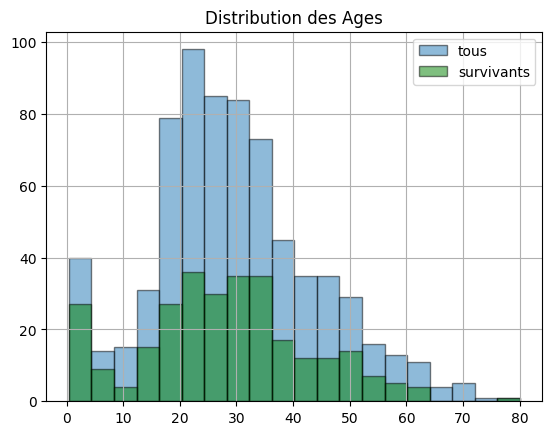

In [16]:
# Utiliser dataframe hist() qui gérera les NaN par défaut

# fig, ax = plt.subplots()
# df_titanic.Age.hist(ax=ax, label='tous', bins=20, edgecolor='black', alpha=0.5)

# Empiler survivants vs tous

# df_titanic[df_titanic.Survived==1].Age.hist(ax=ax, bins=20, color='g', label='survivants', edgecolor='black', alpha=0.5)
# ax.set_title('Distribution des Ages')
# ax.legend()

Les enfants ont un taux de survie plus élevé.

[Retour en haut](#Table-des-matières)

## Étape 3 : Préparation des données
Créer de nouvelles caractéristiques par l'ingénierie des caractéristiques ; Traiter les valeurs manquantes ; Nettoyer les données, c'est-à-dire supprimer les espaces blancs supplémentaires dans les valeurs de chaîne. Nous nous concentrerons sur le traitement des données manquantes dans cette phase.

In [17]:
# Vérifier toutes les données manquantes

# df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Traiter les données manquantes
Nous allons démontrer le remplissage avec la moyenne/le mode et l'estimation à partir d'autres colonnes.

#### Remplir avec la moyenne/le mode

`Embarked` n'a que 2 valeurs manquantes et il n'y a pas de moyen évident d'estimer la valeur manquante, nous allons simplement la remplir avec le mode de la colonne, ou 'S'

Le **mode** en statistique est la valeur la plus souvent observée, celle dont l'effectif est le plus grand.

##### Tâche 12 : Remplir les valeurs manquantes de Embarked avec le mode

In [18]:
# Remplacer NaN dans Embarked avec le mode

# df_titanic['Embarked'].fillna(df_titanic.Embarked.mode()[0],inplace=True)
# df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


#### Remplir avec une valeur estimée

Un titre est un mot utilisé dans le nom d'une personne, dans certains contextes. Il peut signifier soit une vénération, une position officielle, ou une qualification professionnelle ou académique. C'est une bonne indication de l'âge, par exemple, M. est pour un homme adulte, Master est pour les jeunes garçons.

Si nous regardons tous les noms des passagers du Titanic, nous pouvons voir que le nom est au format Nom, Titre. Prénom. Nous pouvons utiliser cette information pour estimer les âges manquants.

- D'abord, nous utiliserons une expression régulière pour extraire le titre du nom.
- Ensuite, nous convertirons le titre en majuscules.
- Puis nous remplirons l'âge manquant avec l'âge moyen du titre spécifique.

In [19]:
# Extraire le préfixe du nom

# df_titanic['Title']=df_titanic.Name.str.extract('([A-Za-z]+\.)')
# df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


##### Tâche 13 : convertir le titre en majuscules.
Pour s'assurer d'obtenir l'âge moyen précis de chaque titre, nous convertissons le titre en tout majuscules.

In [20]:
# df_titanic.Title = df_titanic.Title.str.upper()
# df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,MR.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,MRS.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,MISS.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,MRS.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,MR.


##### Tâche 14 : Remplir l'âge manquant avec l'âge moyen du titre

In [21]:
# df_titanic.Title.value_counts()

MR.          517
MISS.        182
MRS.         125
MASTER.       40
DR.            7
REV.           6
MLLE.          2
MAJOR.         2
COL.           2
COUNTESS.      1
CAPT.          1
MS.            1
SIR.           1
LADY.          1
MME.           1
DON.           1
JONKHEER.      1
Name: Title, dtype: int64

In [22]:
# df_titanic.Age.fillna(df_titanic.groupby('Title').Age.transform('mean'), inplace=True)
# df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 69.7+ KB


### Ingénierie des caractéristiques
Nous allons créer une nouvelle colonne FamilySize. Il y a 2 colonnes liées à la taille de la famille, parch indique le nombre de parents ou d'enfants, Sibsp indique le nombre de frères et sœurs et d'époux.

Prenons un nom 'Asplund' comme exemple, nous pouvons voir que la taille totale de la famille est de 7 (Parch + SibSp + 1), et chaque membre de la famille a la même valeur de Fare, ce qui signifie que le Fare est pour tout le groupe. Donc la taille de la famille sera une caractéristique importante pour prédire le Fare. Il n'y a que 4 Asplunds sur 7 dans le dataset car le dataset n'est qu'un sous-ensemble de tous les passagers.

In [23]:
# df_titanic[df_titanic.Name.str.contains('Asplund')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,MRS.
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,MASTER.
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,MISS.
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,MASTER.


##### Tâche 15 : Créer la colonne 'FamilySize'
FamilySize = Parch + SibSp + 1

In [24]:
# df_titanic['FamilySize'] = df_titanic.Parch + df_titanic.SibSp + 1
# df_titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
389,390,1,2,"Lehmann, Miss. Bertha",female,17.00000,0,0,SC 1748,12.000,NaN,C,MISS.,1
665,666,0,2,"Hickman, Mr. Lewis",male,32.00000,2,0,S.O.C. 14879,73.500,NaN,S,MR.,3
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00000,0,0,LINE,0.000,NaN,S,MR.,1
598,599,0,3,"Boulos, Mr. Hanna",male,32.36809,0,0,2664,7.225,NaN,C,MR.,1
461,462,0,3,"Morley, Mr. William",male,34.00000,0,0,364506,8.050,NaN,S,MR.,1


### Conclusion

Dans cette étude de cas, nous avons exploré le jeu de données du Titanic en suivant les étapes du processus de data mining :

1. Nous avons commencé par comprendre le contexte métier et les objectifs de l'analyse.
2. Nous avons ensuite exploré et compris les données, en identifiant les caractéristiques importantes et leurs relations.
3. Enfin, Nous avons préparé les données en traitant les valeurs manquantes et en créant de nouvelles caractéristiques.

Cette analyse nous a permis de tirer plusieurs conclusions intéressantes sur les facteurs qui ont influencé la survie et le prix du billet sur le Titanic. Cependant, il est important de noter que ce n'est qu'un début. Pour une analyse plus approfondie, on pourrait envisager :

- D'utiliser des techniques de classification pour prédire la survie.
- D'explorer d'autres caractéristiques ou combinaisons de caractéristiques.
- D'utiliser des techniques de modélisation plus avancées.

Cette étude de cas illustre comment l'analyse de données peut nous aider à comprendre des événements historiques et à tirer des leçons qui pourraient être applicables dans d'autres contextes.